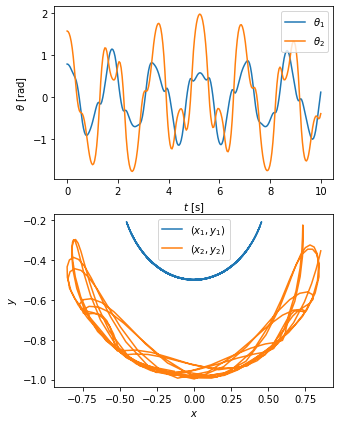

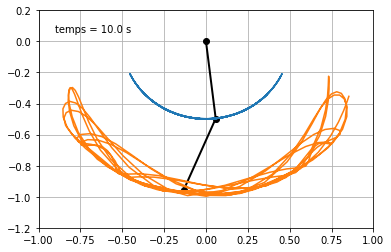

In [1]:
import numpy as np
g, l, m = 9.82, 0.5, 0.1
def dy(y, t):
     y1, y2, y3, y4 = y[0], y[1], y[2], y[3]
     dy1 = 6.0/m/l**2*(2*y3 - 3*np.cos(y1-y2)*y4)/(16 - 9*np.cos(y1-y2)**2)
     dy2 = 6.0/m/l**2*(8*y4 - 3*np.cos(y1-y2)*y3)/(16 - 9*np.cos(y1-y2)**2)
     dy3 = -0.5*m*l**2*(+dy1*dy2*np.sin(y1-y2) + 3*(g/l)*np.sin(y1))
     dy4 = -0.5*m*l**2*(-dy1*dy2*np.sin(y1-y2) + 1*(g/l)*np.sin(y2))
     return [dy1, dy2, dy3, dy4]
 # Anfangsbedingungen
y0 = [np.pi/4, np.pi/2, 0, 0]
 #Zeitabtastung
t = np.linspace(0, 10, 250)
# DGL lösen

from scipy.integrate import odeint

import matplotlib.pyplot as plt

import matplotlib.animation as animation

y = odeint(dy, y0, t)
t1, t2 = y[:, 0], y[:, 1]
fig, ax = plt.subplots(2, 1, figsize=(5,7))
ax[0].plot(t, t1, label=r"$\theta_1$")
ax[0].plot(t, t2, label=r"$\theta_2$")
ax[0].set(xlabel=r"$t$ [s]",
ylabel=r"$\theta$ [rad]")
ax[0].legend()
x1, y1 = l*np.sin(t1), -l*np.cos(t1)
x2, y2 = x1 + l*np.sin(t2), y1 - l*np.cos(t2)
ax[1].plot(x1, y1, label=r"$(x_1, y_1)$")
ax[1].plot(x2, y2, label=r"$(x_2, y_2)$")
ax[1].set(xlabel=r"$x$", ylabel=r"$y$")
ax[1].legend()
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False,
xlim=(-1, 1), ylim=(-1.2, 0.2))
ax.grid()
pendule, = ax.plot([], [], "ok-", lw=2)
mvt1, = ax.plot([], [], c="C0")
mvt2, = ax.plot([], [], c="C1")
text = ax.text(0.05, 0.9, "", transform=ax.transAxes)
def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    pendule.set_data(thisx, thisy)
    mvt1.set_data(x1[:i], y1[:i])
    mvt2.set_data(x2[:i], y2[:i])
    text.set_text("temps = %.1f s" % (i*0.04))
    return pendule, mvt1, mvt2, text
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),interval=25, blit=True)
ani.save("double_pendulum.gif", fps=15)